<a href="https://colab.research.google.com/github/jeonuenseo/DeepLearning-20F/blob/master/01_linear_regression_using_tensorflow_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

라이브러리 import

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

X and Y data(given)

In [ ]:
x_train = [1, 2, 3, 4, 5]
y_train = [3, 5, 7, 9, 11] #y = 2x+1

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length) #평균이 0이고 표준편차가 1인 노이즈를 랜덤생성

y_train = y_train + y_noise
#노이즈 수동으로 줘도 됨

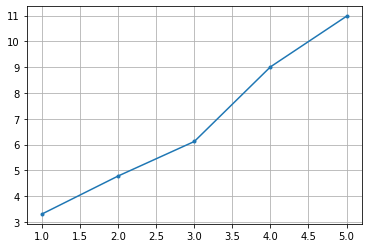

In [ ]:
plt.plot(x_train, y_train, '.-')
plt.grid()

initialization

In [ ]:
useRandom = False

In [ ]:
if useRandom:
  W = tf.Variable(tf.random_normal([1]), name='weight')
  b = tf.Variable(tf.random_normal([1]), name='bias')

else:
  w0 = 8.0;
  b0 = 3.0; #초기값

  W = tf.Variable(w0*tf.ones([1]), name='weight')
  b = tf.Variable(b0*tf.ones([1]), name='bias')

Our hypotesis
$$ H(x)=Wx + b $$

In [ ]:
hypothesis = x_train * W + b

  **cost/loss function 정의하기**
  * loss of one training example : 
    $$loss = {L}(\hat{y}, y) = (\hat{y}^{(i)} - y^{(i)})^2 $$
    
  

In [ ]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

optimizer

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(loss)

Launch the graph in a session

In [ ]:
sess = tf.Session()

Initializes global variables in the graph.

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
nb_epoch = 101
vloss = []
vw = []
vb = []

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss) #loss가 작아져야 에러가 줄어듦
    w2 = sess.run(W)
    b2 = sess.run(b)
    vloss.append(loss1)
    vw.append(w2)
    vb.append(b2)

    
    if step % 200 == 0: # 200번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        
        print(step,'\t', loss1, '\t', w1, '\t', b1)

0 	 279.53717 	 6.548748 	 2.5968587


Text(0, 0.5, 'loss')

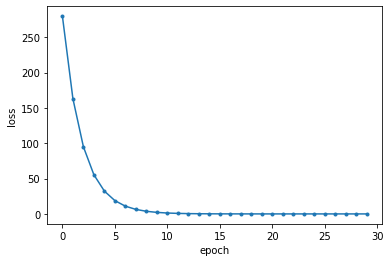

In [ ]:
plt.plot(vloss[:30], '.-')
plt.xlabel('epoch')
plt.ylabel('loss')

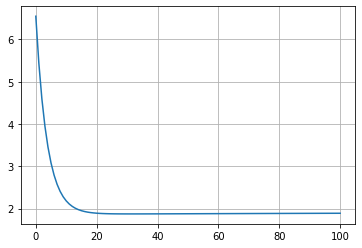

In [ ]:
plt.plot(vw)
plt.grid()

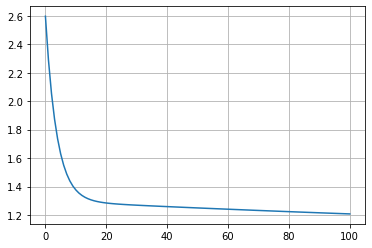

In [ ]:
plt.plot(vb)
plt.grid()

In [ ]:
w1 = sess.run(W)[0]
b1 = sess.run(b)[0]

출력해보기

In [ ]:
print(w1, b1)

str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

1.8911839 1.2079046
y = 1.8911839x + 1.2079046


Text(0.5, 1.0, 'y = 1.8911839x + 1.2079046')

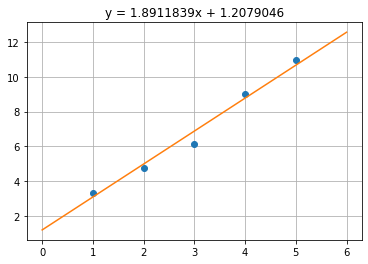

In [ ]:

plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)